# Mohr circle for strains

© 2022 Exneyder A. Montoya-Araque, Daniel F. Ruiz and Universidad EAFIT.

This notebook can be interactively run in [Google - Colab](https://colab.research.google.com/github/AppliedMechanics-EAFIT/EAFIT_slope_stability/blob/main/notebooks/01_cond_factors/mohr_circles_for_strains.ipynb).


This notebook was developed following the theory presented in Ch. 1 - Book Mohr Circles, Stress Paths and Geotechnics (2nd Ed.) by {cite:t}`Parry2014_MohrCircles`.

<!-- [Parry (2004)](https://doi.org/10.1201/9781482264982). -->

## Required modules and global setup for plots

In [1]:
import ast
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import widgets as wgt
from IPython import get_ipython
from IPython.display import display

if 'google.colab' in str(get_ipython()):
    print('Running on CoLab. Installing the required modules...')
    from subprocess import run
    run('pip install ipympl', shell=True);
    from google.colab import output
    output.enable_custom_widget_manager()
    
# Figures setup
# %matplotlib widget
mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman", "cmr", "cmr10", "DejaVu Serif"],  # or 
    "mathtext.fontset": "cm",  # Use Computer Modern fonts for math
    "axes.formatter.use_mathtext": True,  # Use mathtext for axis labels
    "axes.unicode_minus": False,   # Use standard minus sign instead of a unicode character
})

# Funciones

In [2]:
def get_strain_state(𝜀_xx, 𝜀_yy, 𝜀_xy):
    c = 0.5 * (𝜀_xx + 𝜀_yy)
    r = np.sqrt((𝜀_xx - c) ** 2 + 𝜀_xy**2)
    𝜀_1 = r * np.cos(0) + c
    𝜀_3 = r * np.cos(np.pi) + c

    strain_state = {
        "𝜀_1": 𝜀_1,
        "𝜀_3": 𝜀_3,
        "𝜀_xx": 𝜀_xx,
        "𝜀_yy": 𝜀_yy,
        "𝜀_xy": 𝜀_xy,
        "𝜀_vol": (𝜀_1 + 𝜀_3),
        "0.5*𝛾_max": r,
        "r": r,
        "c": c
    }
    return strain_state

def get_xy_from_angle(angle, r, c):
    x, y = r * np.cos(2*np.deg2rad(angle)) + c, r * np.sin(2*np.deg2rad(angle))
    return x, y

def plot_mohr_circle(𝜀_xx, 𝜀_yy, 𝜀_xy, plot_pole=False, plot_plane=False, 𝜔=10,
                     xlim=None, ylim=None, **kwargs):
    strain_state = get_strain_state(𝜀_xx, 𝜀_yy, 𝜀_xy)
    pole = (𝜀_xx, -1 * 𝜀_xy)
    angles4circ = np.linspace(0, 2 * np.pi, 200)

    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=kwargs.get('figsize'))
    ax.plot(strain_state['r'] * np.cos(angles4circ) + strain_state['c'],
            strain_state['r'] * np.sin(angles4circ), c="k")  # Mohr circle
    ax.axhline(y=0, c="k")

    params = {'ls': "", "fillstyle": 'none', "markeredgewidth": 2, "ms": 7}
    label = ("$\\varepsilon_{xx}=$" + f"{𝜀_xx:.2f}" + ",\n$\\varepsilon_{xy}=$" + f"{𝜀_xy:.2f}")
    ax.plot(𝜀_xx, 𝜀_xy, c="C3", marker="s", label=label, **params)  # 𝜀_xx, 𝜀_xy
    label = ("$\\varepsilon_{yy}=$" + f"{𝜀_yy:.2f}" + ",\n$\\varepsilon_{yx}=$" + f"{𝜀_xy:.2f}")
    ax.plot(𝜀_yy, -1 * 𝜀_xy, c="C4", marker="s", label=label, **params)  # 𝜀_yy, (-)𝜀_xy
    ax.plot(strain_state['c'], 0, ls="", c="k", marker=(8, 2, 0), ms=10) # Mean strain (center)
    label = "$0.5\\gamma_\mathrm{max}=$" + f"{strain_state['r']:.2f}" # Max shear str (radius)
    ax.plot(strain_state['c'], strain_state['r'], c="C2", marker='v', label=label, **params)
    label = "$\\varepsilon_{1}=$" + f"{strain_state['𝜀_1']:.2f}"  # epsilon_1
    ax.plot(strain_state['𝜀_1'], 0, c="C0", marker= "o", label=label, **params)
    label = "$\\varepsilon_{3}=$" + f"{strain_state['𝜀_3']:.2f}"  # epsilon_3
    ax.plot(strain_state['𝜀_3'], 0, c="C1", marker= "o", label=label, **params)

    if plot_pole:  # Pole and stress on a plane
        ax.axvline(x=pole[0], c="C3", ls="-", lw=1.25)
        ax.axhline(y=pole[1], c="C4", ls="-", lw=1.25)
        ax.plot(*pole, ls="", c="k", marker=".", fillstyle='full', ms=7,
            label=f"$P\ ({pole[0]:.2f}, {pole[1]:.2f})$")
    if plot_plane:
        𝛽 = 0.5 * np.degrees(np.arctan2(2 * 𝜀_xy, 𝜀_yy - 𝜀_xx))
        𝜃 = -(𝜔 + 𝛽)
        𝜀_dir, 𝜀_shr = get_xy_from_angle(𝜃, strain_state['r'], strain_state['c'])
        ax.plot((strain_state['c'], 𝜀_yy, 𝜀_xx), (0, -𝜀_xy, -𝜀_xy), c="k", ls="--",
            lw=1.25, label="Plane $\\varepsilon_y$")
        label=f"Plane at $\\omega={𝜔:.1f}$" + \
            "$^{\\circ}\\circlearrowright$\nfrom Plane $\\varepsilon_y$"
        ax.plot((𝜀_dir, pole[0]), (𝜀_shr, pole[1]), c="C5", ls="--", lw=1.25, label=label)
        label = f"Plane at $2\\omega={2*𝜔:.1f}$" + \
            "$^{\\circ}\\circlearrowright$\nfrom Plane $\\varepsilon_y$"
        ax.plot((𝜀_dir, strain_state['c']), (𝜀_shr, 0), c="C6", ls="--", lw=1.25, label=label)
        label = ("Strains on the plane\n" + "$\\varepsilon=$" + f"{𝜀_dir:.2f}"
            + ", $0.5\\gamma=$" + f"{𝜀_shr:.2f}")
        ax.plot(𝜀_dir, 𝜀_shr, ls="", c="k", marker=".", label=label)
        
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    ax.grid(True, ls="--")
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.set_aspect("equal", anchor=None)
    ax.set(
        xlabel="Direct strain, $\\varepsilon$",
        ylabel="Shear strain, $0.5\\gamma$",
        xlim=xlim,
        ylim=ylim
    )
    return strain_state

In [3]:
def plot_zero_ext_comp_lines(𝛿𝜀_h, 𝛿𝜀_v, plot_plane=False, 𝜔=10, xlim=None,
                             ylim=None, **kwargs):
    𝛿𝜀_1, 𝛿𝜀_3 = max(𝛿𝜀_h, 𝛿𝜀_v), min(𝛿𝜀_h, 𝛿𝜀_v)  # Principal strains

    def getlbl(𝛿𝜀):
        lb = 'h' if 𝛿𝜀 == 𝛿𝜀_h else 'v'
        return '$\\delta\\varepsilon_\\mathrm{'+lb+'}=$'

    strain_state = get_strain_state(𝛿𝜀_1, 𝛿𝜀_3, 0)
    angles4circ = np.linspace(0, 2 * np.pi, 200)
    pole = (𝛿𝜀_h, 0)
    𝜓 = np.rad2deg(np.arcsin(-strain_state['c'] / (strain_state['r'])))

    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=kwargs.get('figsize'))
    ax.plot(strain_state['r'] * np.cos(angles4circ) + strain_state['c'],
            strain_state['r'] * np.sin(angles4circ), c="k")  # Mohr circle
    params = {'ls': "", "fillstyle": 'none', "markeredgewidth": 1.75, "ms": 7}
    label = ("$\\delta\\varepsilon_1=$" + getlbl(𝛿𝜀_1) + f"{𝛿𝜀_1:.2f}")
    ax.plot(𝛿𝜀_1, 0, c="C0", marker="o", label=label, **params)  # 𝛿𝜀_1
    label = ("$\delta\\varepsilon_3=$" + getlbl(𝛿𝜀_3) + f"{𝛿𝜀_3:.2f}")
    ax.plot(𝛿𝜀_3, 0, c="C1", marker="o", label=label, **params)  # 𝛿𝜀_3
    ax.plot(strain_state['c'], 0, ls="", c="k", marker=(8, 2, 0), ms=10) # Mean strain (center)
    label = "$0.5\\delta\\gamma_\mathrm{max}=$" + f"{strain_state['r']:.2f}" # Max shear str (radius)
    ax.plot(strain_state['c'], strain_state['r'], c="C2", marker='v', label=label, **params)
    label = "$0.5\\delta\\varepsilon_\\mathrm{vol}=" + f"{strain_state['c']:.3f}$" + \
        f"\n$\\hookrightarrow \\psi={𝜓:.1f}$" + "$^{\circ}$"
    ax.plot((strain_state['c'], 0), (0, 0), c="grey", ls="-", lw=3, label=label)  # 𝛿v/2)
    # Zero extension lines
    𝛽 = 0.5 * np.degrees(np.arctan2(0, 𝛿𝜀_v - 𝛿𝜀_h))
    𝜃_zero = np.rad2deg(0.5 * np.arccos(-strain_state['c'] / strain_state['r']))
    𝜀_dir, 𝜀_shr = get_xy_from_angle(𝜃_zero, strain_state['r'], strain_state['c'])
    ax.plot((𝜀_dir, 𝛿𝜀_h, 𝜀_dir), (𝜀_shr, 0, -𝜀_shr), c="k", ls="--", lw=1.25,
        label="Zero direct strain planes\n($\\delta\\varepsilon=0$)")
    𝜀_dir, 𝜀_shr = get_xy_from_angle(𝜃_zero-90, strain_state['r'], strain_state['c'])
    ax.plot((𝜀_dir, 𝛿𝜀_h, 𝜀_dir), (𝜀_shr, 0, -𝜀_shr), c="k", ls="-", lw=1.25,
        label="Zero extension lines")
    # Arbitrary plane
    if  plot_plane:
        ax.plot((𝛿𝜀_v, 𝛿𝜀_h), (0, 0), c="C3", ls="--", lw=1.25,
                label="Plane $\\delta\\varepsilon_\\mathrm{v}$")
        𝜃 = -(𝜔 + 𝛽)
        𝜀_dir, 𝜀_shr = get_xy_from_angle(𝜃, strain_state['r'], strain_state['c'])
        label=f"Plane at $\\omega={𝜔:.1f}$" + \
            "$^{\circ}\\circlearrowright$\nfrom Plane $\\delta\\varepsilon_1$"
        ax.plot((𝜀_dir, pole[0]), (𝜀_shr, pole[1]), c="C4", ls="--", lw=1.25, label=label)
        label = f"Plane at $2\\omega={2*𝜔:.1f}$" + \
                "$^{\circ}\\circlearrowright$\nfrom Plane $\\delta\\varepsilon_\\mathrm{v}$"
        ax.plot((𝜀_dir, strain_state['c']), (𝜀_shr, 0), c="C5", ls="--", lw=1.25, label=label)
        label = ("Strains on the plane\n" + "$\\varepsilon=$" + f"{𝜀_dir:.2f}"
                 + ", $0.5\\gamma=$" + f"{𝜀_shr:.2f}")
        ax.plot(𝜀_dir, 𝜀_shr, ls="", c="k", marker="o", fillstyle='none', label=label)
    ax.plot(*pole, ls="", c="k", marker=".", fillstyle='full', ms=7, # Pole
            label=f"$P\ ({pole[0]:.2f}, {pole[1]:.2f})$")
    # Plot settings
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    ax.grid(True, ls="--")
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.set_aspect("equal", anchor=None)
    ax.set(xlabel="$\\delta\\varepsilon$", ylabel="$\\delta0.5\delta\\gamma$",
        xlim=xlim, ylim=ylim)
    return


# Ejemplo básico del Circulo de Mohr

{'𝜀_1': 0.3208871399615304,
 '𝜀_3': -0.13088713996153037,
 '𝜀_xx': -0.01,
 '𝜀_yy': 0.2,
 '𝜀_xy': -0.2,
 '𝜀_vol': 0.19000000000000003,
 '0.5*𝛾_max': 0.22588713996153037,
 'r': 0.22588713996153037,
 'c': 0.095}

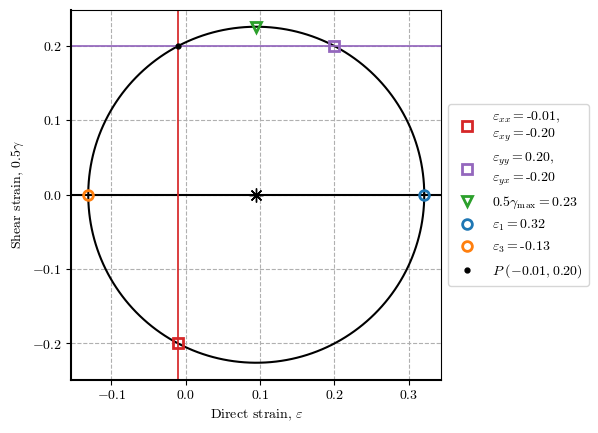

In [4]:
# plot_mohr_circle(𝜀_xx=30, 𝜀_yy=20, 𝜀_xy=10)
plot_mohr_circle(𝜀_xx=-0.01, 𝜀_yy=0.2, 𝜀_xy=-0.2, plot_pole=True)

In [5]:
s, l = {'description_width': '60px'}, wgt.Layout(width='400px')
s_env, l_env = {'description_width': '60px'}, wgt.Layout(width='190px')
controls = {
    'ε_xx': wgt.FloatSlider(value=-0.1, min=-1, max=1, description="𝜀_xx", style=s, layout=l),
    'ε_yy': wgt.FloatSlider(value=0.2, min=-1, max=1, description="𝜀_yy", style=s, layout=l),
    'ε_xy': wgt.FloatSlider(value=-0.2, min=-1, max=1, description="𝜀_xy", style=s, layout=l),
    'plot_pole': wgt.Checkbox(value=False, description="Plot pole?", style=s, layout=l),
    'plot_plane': wgt.Checkbox(value=False, description="Plot a plane? → ", style=s_env, layout=wgt.Layout(width='180px')),
    'ω': wgt.FloatSlider(value=10, min=0, max=180, step=0.2, description="𝜔", style={'description_width': '10px'}, layout=wgt.Layout(width='220px')),
    'xlim': wgt.FloatRangeSlider(value=[-.3, .5], min=-1, max=1, step=.5, description='x-axis:', readout_format='.0f', style=s, layout=l),
    'ylim': wgt.FloatRangeSlider(value=[-.3, .3], min=-1, max=1, step=.5, description='y-axis:', readout_format='.0f', style=s, layout=l),
    'static_fig': wgt.Checkbox(value=True, description='Non-vector image (improve widget performance)', disabled=False, style=s, layout=l)
}
c_all = list(controls.values())
c_pln = [wgt.HBox(c_all[4:6])]
c = c_all[:4] + c_pln + c_all[6:]
fig = wgt.interactive_output(plot_mohr_circle, controls)
wgt.HBox((wgt.VBox(c), fig), layout=wgt.Layout(align_items='center'))

# Lineas de cero extensión en el círculo de Mohr

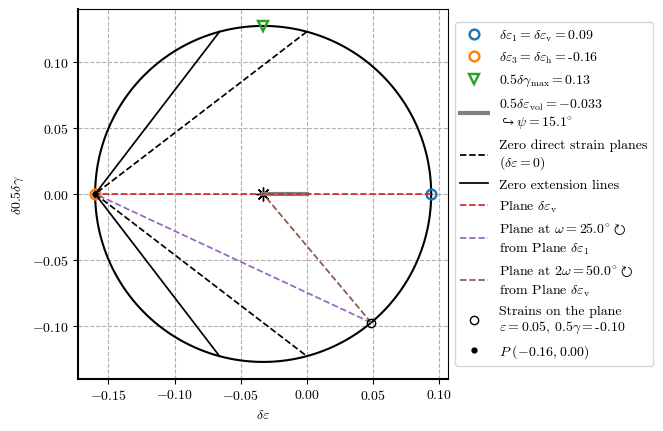

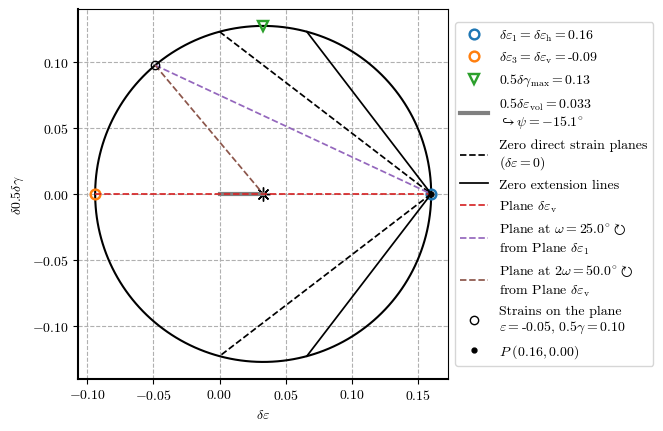

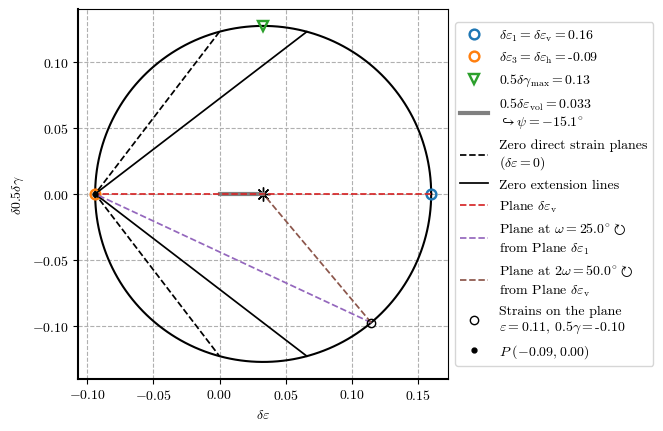

In [6]:
plot_zero_ext_comp_lines(𝛿𝜀_h=-0.16, 𝛿𝜀_v=0.094, plot_plane=True, 𝜔=25)
plot_zero_ext_comp_lines(𝛿𝜀_h=0.16, 𝛿𝜀_v=-0.094, plot_plane=True, 𝜔=25)
plot_zero_ext_comp_lines(𝛿𝜀_h=-0.094, 𝛿𝜀_v=0.16, plot_plane=True, 𝜔=25)

In [7]:
s, l = {'description_width': '60px'}, wgt.Layout(width='400px')
s_env, l_env = {'description_width': '60px'}, wgt.Layout(width='190px')
controls = {
    'δε_h': wgt.FloatSlider(value=-0.16, min=-1, max=1, step=.0001, description="𝛿𝜀_h", readout_format='.4f', style=s, layout=l),
    'δε_v': wgt.FloatSlider(value=0.0942, min=-1, max=1, step=.0001, description="𝛿𝜀_v", readout_format='.4f', style=s, layout=l),
    'plot_plane': wgt.Checkbox(value=False, description="Plot a plane? → ", style=s_env, layout=wgt.Layout(width='180px')),
    'ω': wgt.FloatSlider(value=10, min=0, max=180, step=1, description="𝜔", style={'description_width': '10px'}, layout=wgt.Layout(width='220px')),
    'xlim': wgt.FloatRangeSlider(value=[-.2, .2], min=-1, max=1, step=.02, description='x-axis:', readout_format='.2f', style=s, layout=l),
    'ylim': wgt.FloatRangeSlider(value=[-.15, .15], min=-1, max=1, step=.02, description='y-axis:', readout_format='.2f', style=s, layout=l),
    'static_fig': wgt.Checkbox(value=True, description='Non-vector image (improve widget performance)', disabled=False, style=s, layout=l)
}
c_all = list(controls.values())
c_pln = [wgt.HBox(c_all[2:4])]
c = c_all[:2] + c_pln + c_all[4:]
fig = wgt.interactive_output(plot_zero_ext_comp_lines, controls)
wgt.HBox((wgt.VBox(c), fig), layout=wgt.Layout(align_items='center'))